In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import utils
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Load Data

In [3]:
(X_traintest, y_traintest), (X_10000, y_10000) = mnist.load_data()
X_traintest = X_traintest.reshape(60000, 784)
X_10000 = X_10000.reshape(10000, 784)
X_train, X_test, y_train, y_test = train_test_split(X_traintest, y_traintest)

num_classes = 10
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_10000 = utils.to_categorical(y_10000, num_classes)

### Model Selection

We first search for the best model with 2 hidden layers.


Best Validation Accuracy is 0.9635999798774719
Best parameters: [(784, 784), 0.001]


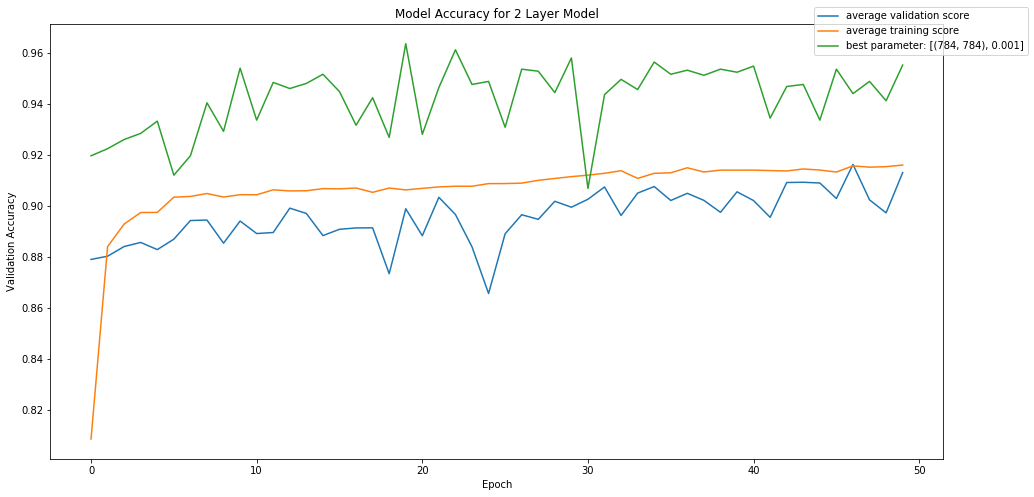

In [4]:
# function to create a 2 layer model
def make_model(hidden_size=(784,784), regularization = 0.1):
    model = Sequential()
    model.add(Dense(hidden_size[0], input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[1], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
    return model

# set parameter values
hidden_size = [(784,784),(784,512),(512,512),(512,392),(392,392),(392,196)]
regularization = [1e-3,1e-2,1e-1,1,10]

# combine different parameters into a list
config_list = []
for x in hidden_size:
    for y in regularization:
        config_list += [[x,y]]

# variables to store validation scores
validation_history = []        
average_validation = np.empty((len(config_list), 50))
average_training = np.empty((len(config_list), 50))
i = 0

# for each set of parameters
for config in config_list:
    
    # create and fit model
    model = make_model(config[0],config[1])
    history = model.fit(X_10000, y_10000, validation_split = 0.25, epochs = 50, verbose = 0)
    
    # store training history 
    validation_history += [np.max(history.history['val_accuracy'])]
    average_validation[i] = history.history['val_accuracy']
    average_training[i] = history.history['accuracy']
    i += 1
    
    
plt.figure(figsize=(16,8))
plt.plot(np.mean(average_validation, axis = 0), label = 'average validation score')
plt.plot(np.mean(average_training, axis = 0), label = 'average training score')
plt.plot(average_validation[np.argmax(validation_history)],
         label = 'best parameter: ' + str(config_list[np.argmax(validation_history)]))
plt.title('Model Accuracy for 2 Layer Model')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Best Validation Accuracy is ' + str(np.max(validation_history)))
print('Best parameters: ' + str(config_list[np.argmax(validation_history)]))

Now let's see if there are improvements for a 3 layer model.

Best Validation Accuracy is 0.967199981212616
Best parameters: [(784, 784, 784), 0.001]


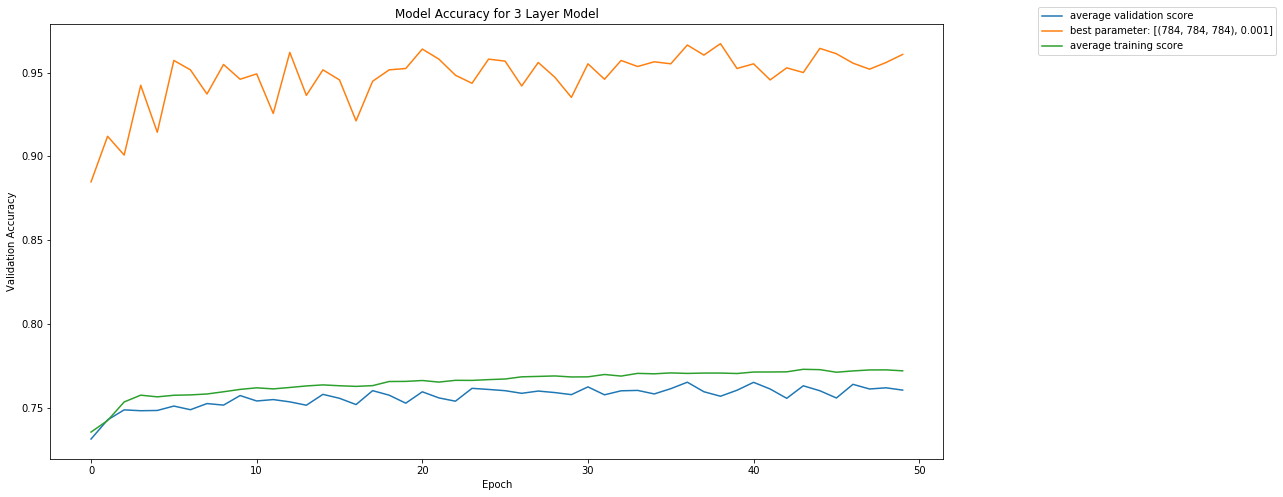

In [5]:
# function to create a 3 layer model
def make_model1(hidden_size=(784,784,784), regularization = 0.1):
    model = Sequential()
    model.add(Dense(hidden_size[0], input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[1], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[2], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
    return model

# set parameter values
hidden_size = [(784,784,784),(512,512,512),(392,392,392),(784,512,512),(784,512,392),(512,392,196),
               (512,392, 392),(196,196,196)]
regularization = [1e-3,1e-2,1e-1,1,10]

# combine different parameters into a list
config_list = []
for x in hidden_size:
    for y in regularization:
        config_list += [[x,y]]

# variables to store validation scores
validation_history = []        
average_validation = np.empty((len(config_list), 50))
average_training = np.empty((len(config_list), 50))
i = 0

# for each set of parameters
for config in config_list:
    
    # create and fit model
    model = make_model1(config[0],config[1])
    history = model.fit(X_10000, y_10000, validation_split = 0.25, epochs = 50, verbose = 0)
    
    # store training history 
    validation_history += [np.max(history.history['val_accuracy'])]
    average_validation[i] = history.history['val_accuracy']
    average_training[i] = history.history['accuracy']
    i += 1
    
    
plt.figure(figsize=(16,8))
plt.plot(np.mean(average_validation, axis = 0), label = 'average validation score')
plt.plot(average_validation[np.argmax(validation_history)], 
         label = 'best parameter: ' + str(config_list[np.argmax(validation_history)]))
plt.plot(np.mean(average_training, axis = 0), label = 'average training score')
plt.title('Model Accuracy for 3 Layer Model')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Best Validation Accuracy is ' + str(np.max(validation_history)))
print('Best parameters: ' + str(config_list[np.argmax(validation_history)]))

Next we check if there is improvement with a 4 layer model. 

Best Validation Accuracy is 0.9675999879837036
Best parameters: [(512, 392, 392, 392), 0.001]


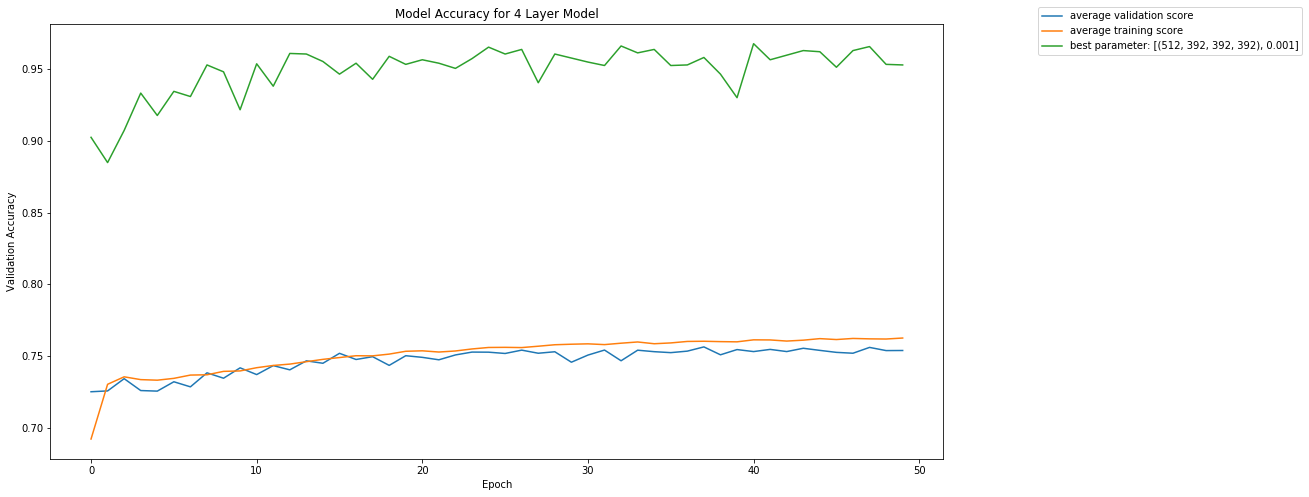

In [6]:
# function to create a 3 layer model
def make_model2(hidden_size=(784,784,784,784), regularization = 0.1):
    model = Sequential()
    model.add(Dense(hidden_size[0], input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[1], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[2], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(hidden_size[3], activation = 'relu', kernel_regularizer = regularizers.l2(regularization)))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
    return model

# set parameter values
hidden_size = [(784,784,784,784),(512,512,512,512),(392,392,392,392),(784,784,512,512),(784,512,392,196),(512,392,196,196),
               (512,392,392,392),(784,512,512,396),(512,392,196,98)]
regularization = [1e-3,1e-2,1e-1,1,10]

# combine different parameters into a list
config_list = []
for x in hidden_size:
    for y in regularization:
        config_list += [[x,y]]

# variables to store validation scores
validation_history = []        
average_validation = np.empty((len(config_list), 50))
average_training = np.empty((len(config_list), 50))
i = 0

# for each set of parameters
for config in config_list:
    
    # create and fit model
    model = make_model2(config[0],config[1])
    history = model.fit(X_10000, y_10000, validation_split = 0.25, epochs = 50, verbose = 0)
    
    # store training history 
    validation_history += [np.max(history.history['val_accuracy'])]
    average_validation[i] = history.history['val_accuracy']
    average_training[i] = history.history['accuracy']
    i += 1
    
    
plt.figure(figsize=(16,8))
plt.plot(np.mean(average_validation, axis = 0), label = 'average validation score')
plt.plot(np.mean(average_training, axis = 0), label = 'average training score')
plt.plot(average_validation[np.argmax(validation_history)], 
         label = 'best parameter: ' + str(config_list[np.argmax(validation_history)]))
plt.title('Model Accuracy for 4 Layer Model')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Best Validation Accuracy is ' + str(np.max(validation_history)))
print('Best parameters: ' + str(config_list[np.argmax(validation_history)]))

Since the improvement from adding layers is very little (within 0.003), we are going to stop at 4 layers. 

Based on graphs above, the best result is achieved around 35 to 45 epochs, therefore we are going to train our model for 40 epochs.

## Training Model
We first train a vanilla model without dropout.

Train on 33750 samples, validate on 11250 samples
Epoch 1/40
33750/33750 [==============================] - 12s 355us/step - loss: 2.2032 - accuracy: 0.8830 - val_loss: 1.4063 - val_accuracy: 0.9378
Epoch 2/40
33750/33750 [==============================] - 10s 291us/step - loss: 1.2386 - accuracy: 0.9431 - val_loss: 1.1352 - val_accuracy: 0.9315
Epoch 3/40
33750/33750 [==============================] - 10s 292us/step - loss: 0.9305 - accuracy: 0.9548 - val_loss: 0.8711 - val_accuracy: 0.9384
Epoch 4/40
33750/33750 [==============================] - 10s 292us/step - loss: 0.7003 - accuracy: 0.9597 - val_loss: 0.6502 - val_accuracy: 0.9533
Epoch 5/40
33750/33750 [==============================] - 10s 291us/step - loss: 0.5437 - accuracy: 0.9597 - val_loss: 0.4883 - val_accuracy: 0.9606
Epoch 6/40
33750/33750 [==============================] - 10s 292us/step - loss: 0.4215 - accuracy: 0.9646 - val_loss: 0.4140 - val_accuracy: 0.9588
Epoch 7/40
33750/33750 [==============================] 

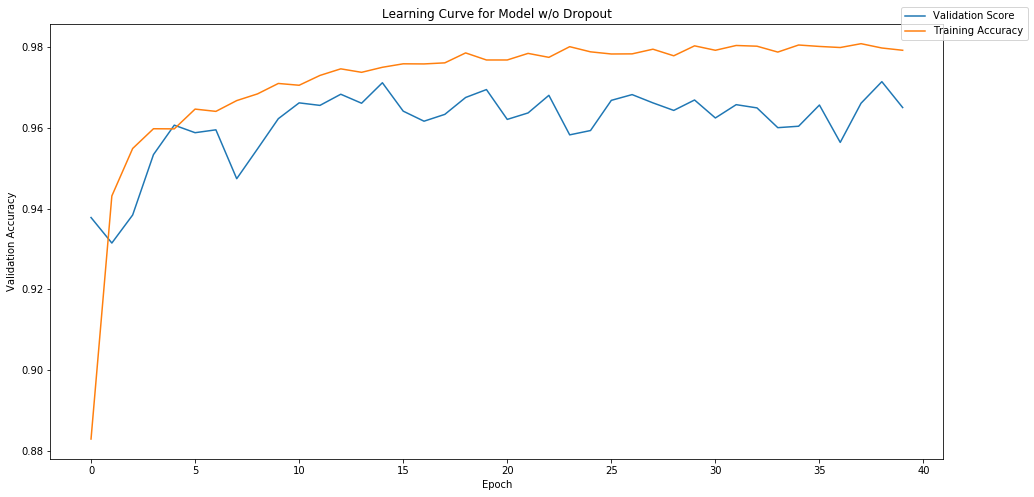

In [7]:
# compile model
model = make_model2((392, 392, 392, 392), 0.001)

# train model
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 40, verbose = 0)

# plot learning curve
plt.figure(figsize = (16, 8))
plt.plot(history.history['val_accuracy'], label = 'Validation Score')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.title('Learning Curve for Model w/o Dropout')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Validation Score: ' + str(history.history['val_accuracy'][-1]))

Then we train a model with dropout between layers (0.5) and see if there are improvements. 

Validation Score: 0.9359111189842224


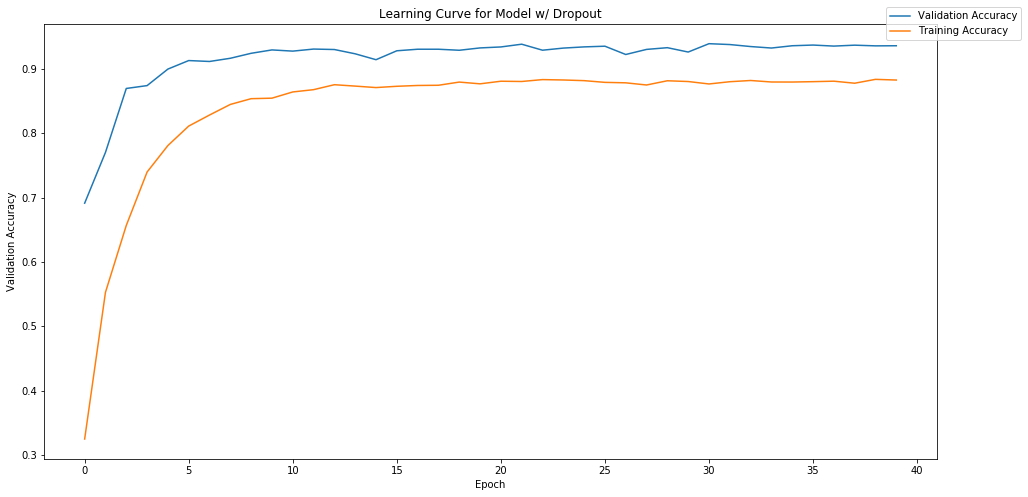

In [8]:
# compile model
model = Sequential()
model.add(Dense(392, input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 40, verbose = 0)

# plot learning curve
plt.figure(figsize = (16, 8))
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.title('Learning Curve for Model w/ Dropout')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Validation Score: ' + str(history.history['val_accuracy'][-1]))

It seems that adding dropout includes decreases the performance of our model, maybe it's because our model has little overfitting problems. 

Lastly we train a model with batch normalization. We will add normalization layer after Activation Layer.

Validation Score: 0.9678221940994263


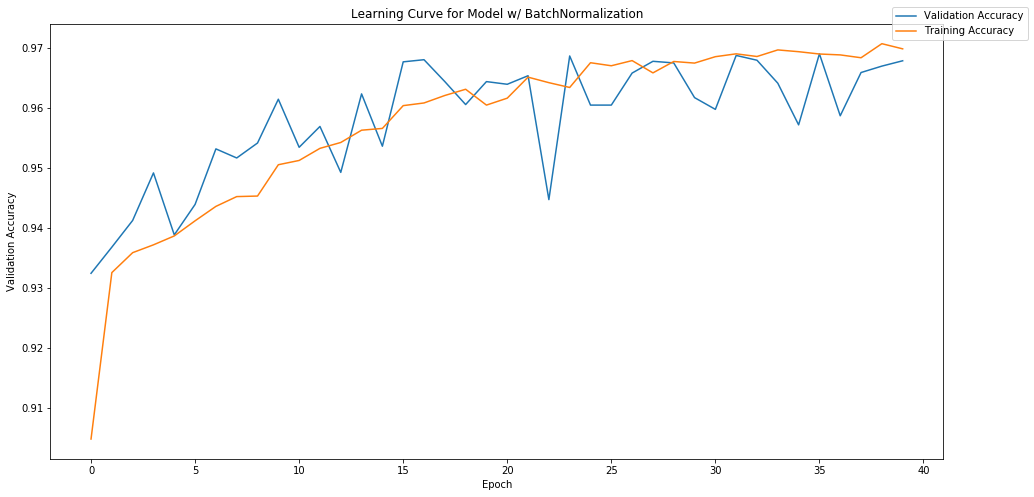

In [9]:
# compile model
model = Sequential()
model.add(Dense(392, input_dim = 784, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(392, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 40, verbose = 0)

# plot learning curve
plt.figure(figsize = (16, 8))
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.title('Learning Curve for Model w/ BatchNormalization')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(bbox_to_anchor=(1.1, 1.05))

print('Validation Score: ' + str(history.history['val_accuracy'][-1]))

It appears that adding Batch Normalization has little change to model performance compared to the vanilla model.